In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
#import pandas_profiling
%matplotlib inline

In [2]:
train_ = pd.read_csv('./data/train.csv',index_col=0)
test_ = pd. read_csv('./data/test.csv',index_col=0)
sample_submission = pd.read_csv('./data/sample_submission.csv', index_col=0)

데이터 설명

-     대전지역에서 측정한 실내외 19곳의 센서데이터와, 주변 지역의 기상청 공공데이터를 semi-비식별화하여 제공합니다. 
-     센서는 온도를 측정하였습니다. 
-     모든 데이터는 시간 순으로 정렬 되어 있으며 10분 단위 데이터 입니다. 
-     예측 대상(target variable)은 Y18입니다. 

train.csv 

-     30일 간의 기상청 데이터 (X00 ~ X39) 및 센서데이터 (Y00~Y17)
-     이후 3일 간의 기상청 데이터 (X00~X39) 및 센서데이터 (Y18)

test.csv 
-     train.csv 기간 이후 80일 간의 기상청 데이터 (X00~X39)

sample_submission.csv
-     제출 양식 예시

X00 X07 X28 X31 X32 기온  
X01 X06 X22 X27 X29 기압  (~1000)  
X02 X03 X18 X24 X26 풍속  
X04 X10 X21 X36 X39 누적강수량  
X05 X08 X09 X23 X33 해면기압  ( ~1000)  
X11 X14 X16 X19 X34 누적일사량  
X12, X20, X30, X37 X38 습도  
X13 X15 X17 X25 X35 풍향  

Y00~17 센서측정온도  

In [3]:
train=train_.copy()
test=test_.copy()

In [4]:
train_tmp=train_.copy()
test_tmp=test_.copy()

In [5]:
train.iloc[:,:10].describe()

X00          X01          X02          X03          X04  \
count  4752.000000  4752.000000  4752.000000  4752.000000  4752.000000   
mean     20.227904   988.621107     1.509764     1.453157     1.270223   
std       4.707570     3.359916     1.071858     0.936151     4.429852   
min       8.300000   977.300000     0.000000     0.000000     0.000000   
25%      16.900000   986.800000     0.700000     0.800000     0.000000   
50%      19.900000   988.600000     1.300000     1.300000     0.000000   
75%      24.100000   991.000000     2.100000     2.000000     0.000000   
max      30.900000   997.200000    10.200000     5.800000    25.600000   

               X05          X06          X07          X08          X09  
count  4752.000000  4752.000000  4752.000000  4752.000000  4752.000000  
mean   1008.333902   989.005093    21.658081  1008.790341  1008.394171  
std       3.395037     3.403714     4.377216     3.520317     3.546180  
min     997.200000   978.100000    11.600000   997.300000   996.300000  
25%    1006.500000   987.100000    18.400000  1006.700000  1006.300000  
50%    1008.500000   989.100000    21.200000  1008.800000  1008.400000  
75%    1010.800000   991.600000    24.825000  1011.400000  1010.900000  
max    1016.800000   997.400000    32.700000  1017.500000  1018.000000

In [6]:
train.iloc[:,10:20].describe()

X10          X11          X12          X13     X14  \
count  4752.000000  4752.000000  4752.000000  4752.000000  4752.0   
mean      1.006734    11.008479    68.209827   161.357639     0.0   
std       3.324415    10.873539    22.278053    98.787460     0.0   
min       0.000000     0.000000    16.400000     0.000000     0.0   
25%       0.000000     0.020000    49.500000    69.225000     0.0   
50%       0.000000     7.690000    72.150000   182.600000     0.0   
75%       0.000000    22.190000    89.025000   228.925000     0.0   
max      18.500000    30.700000    97.900000   360.000000     0.0   

               X15     X16          X17          X18     X19  
count  4752.000000  4752.0  4752.000000  4752.000000  4752.0  
mean    174.346654     0.0   161.823864     1.377462     0.0  
std      97.785811     0.0   115.943382     1.155024     0.0  
min       0.000000     0.0     0.000000     0.000000     0.0  
25%     115.600000     0.0    33.875000     0.500000     0.0  
50%     170.250000     0.0   190.450000     1.000000     0.0  
75%     258.400000     0.0   253.125000     2.100000     0.0  
max     359.900000     0.0   360.000000     8.900000     0.0

In [7]:
train.iloc[:,20:30].describe()

X20          X21          X22          X23          X24  \
count  4752.000000  4752.000000  4752.000000  4752.000000  4752.000000   
mean     71.478872     1.138363  1001.773190  1008.850989     0.985059   
std      21.830446     4.079039     3.367735     3.417633     1.091314   
min      19.700000     0.000000   990.800000   997.500000     0.000000   
25%      53.075000     0.000000   999.900000  1006.900000     0.000000   
50%      74.200000     0.000000  1001.900000  1008.900000     0.700000   
75%      92.600000     0.000000  1004.200000  1011.400000     1.700000   
max      97.900000    21.000000  1010.100000  1017.100000     6.000000   

               X25          X26          X27          X28          X29  
count  4752.000000  4752.000000  4752.000000  4752.000000  4752.000000  
mean    139.524453     1.369886  1007.554924    22.079040  1000.811932  
std     131.438036     1.240900     3.446475     4.225203     3.390206  
min       0.000000     0.000000   997.200000    10.300000   989.700000  
25%       0.000000     0.300000  1005.500000    19.000000   998.900000  
50%     134.150000     1.100000  1007.700000    21.700000  1000.900000  
75%     270.900000     2.100000  1010.200000    25.200000  1003.400000  
max     359.900000     6.800000  1015.400000    33.200000  1009.000000

In [8]:
train.iloc[:,30:40].describe()

X30          X31          X32          X33          X34  \
count  4752.000000  4752.000000  4752.000000  4752.000000  4752.000000   
mean     65.657639    19.846528    20.012984  1009.074747    11.567563   
std      21.525699     5.520259     5.271630     3.440669    11.386727   
min      17.400000     5.300000     5.500000   998.700000     0.000000   
25%      48.075000    16.000000    16.300000  1007.075000     0.030000   
50%      69.400000    19.400000    19.600000  1009.200000     8.210000   
75%      85.600000    24.100000    24.100000  1011.700000    22.562500   
max      97.200000    33.100000    32.900000  1016.800000    32.240000   

               X35          X36          X37          X38          X39  
count  4752.000000  4752.000000  4752.000000  4752.000000  4752.000000  
mean    208.400505     1.533817    65.918771    58.178704     1.083123  
std      99.580562     5.578607    19.527173    18.368285     4.617366  
min       0.000000     0.000000    17.500000    17.900000     0.000000  
25%     155.300000     0.000000    51.500000    44.600000     0.000000  
50%     240.850000     0.000000    67.300000    59.100000     0.000000  
75%     277.800000     0.000000    81.900000    72.700000     0.000000  
max     359.900000    33.600000    97.800000    94.800000    28.000000

In [9]:
name1='Temp'
name2='Press'
name3='WindSpeed'
name4='Accum_Precipi'
name5='SeaLevel_Press'
name6='Accum_SolarRadi'
name7='Humidi'
name8='WindDirect'

X00 X07 X28 X31 X32 기온  
X01 X06 X22 X27 X29 기압  (~1000)  
X02 X03 X18 X24 X26 풍속  
X04 X10 X21 X36 X39 누적강수량  
X05 X08 X09 X23 X33 해면기압  ( ~1000)  
X11 X14 X16 X19 X34 누적일사량   
X12, X20, X30, X37 X38 습도   
X13 X15 X17 X25 X35 풍향  

In [10]:
temp=train[['X00', 'X07', 'X28', 'X31', 'X32']]
press=train[['X01' ,'X06', 'X22', 'X27', 'X29']]
winds=train[['X02', 'X03', 'X18', 'X24', 'X26']]
precp=train[['X04', 'X10', 'X21', 'X36', 'X39']]
press2= train[['X05', 'X08', 'X09', 'X23', 'X33']]
solar=train[['X11', 'X14', 'X16', 'X19', 'X34']]
humid=train[['X12', 'X20', 'X30', 'X37', 'X38' ]]
wdirec=train[['X13', 'X15', 'X17', 'X25', 'X35']]

temp2=train.iloc[:,40:58]

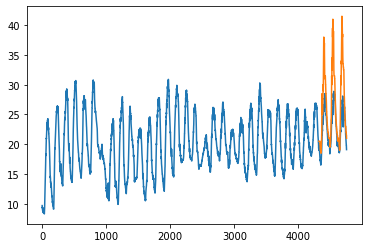

In [23]:
plt.plot(temp.iloc[:,0])
plt.plot(train.iloc[:,-1])

In [30]:
t1=temp[:4320]
t2=train.iloc[:,40:-1][:4320]

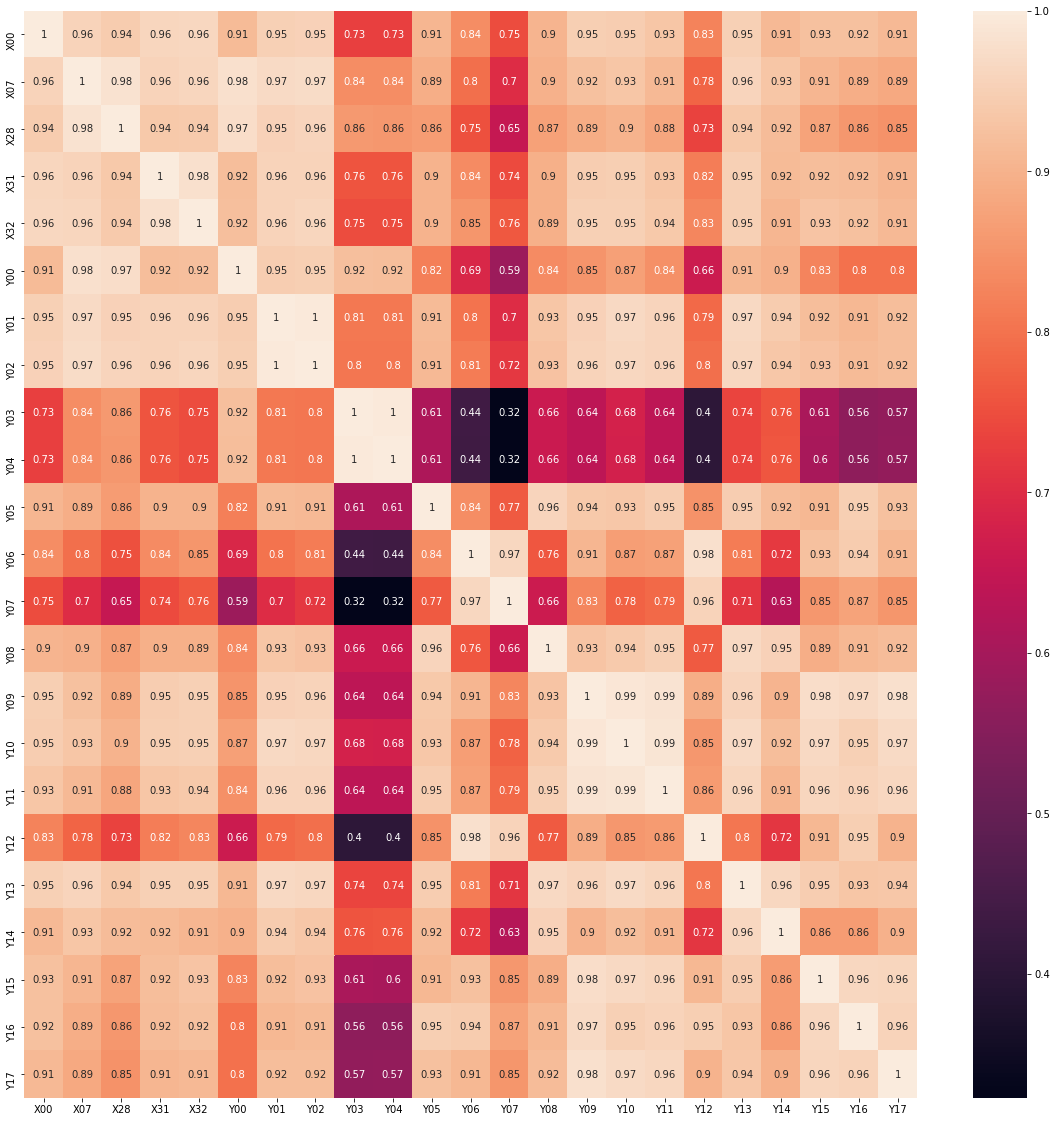

In [32]:
plt.figure(figsize=(20,20))
sc1=pd.concat([t1,t2],axis=1)
c1=sc1.corr()
sns.heatmap(c1,annot=True)

# Temp and Temp2 Correlation

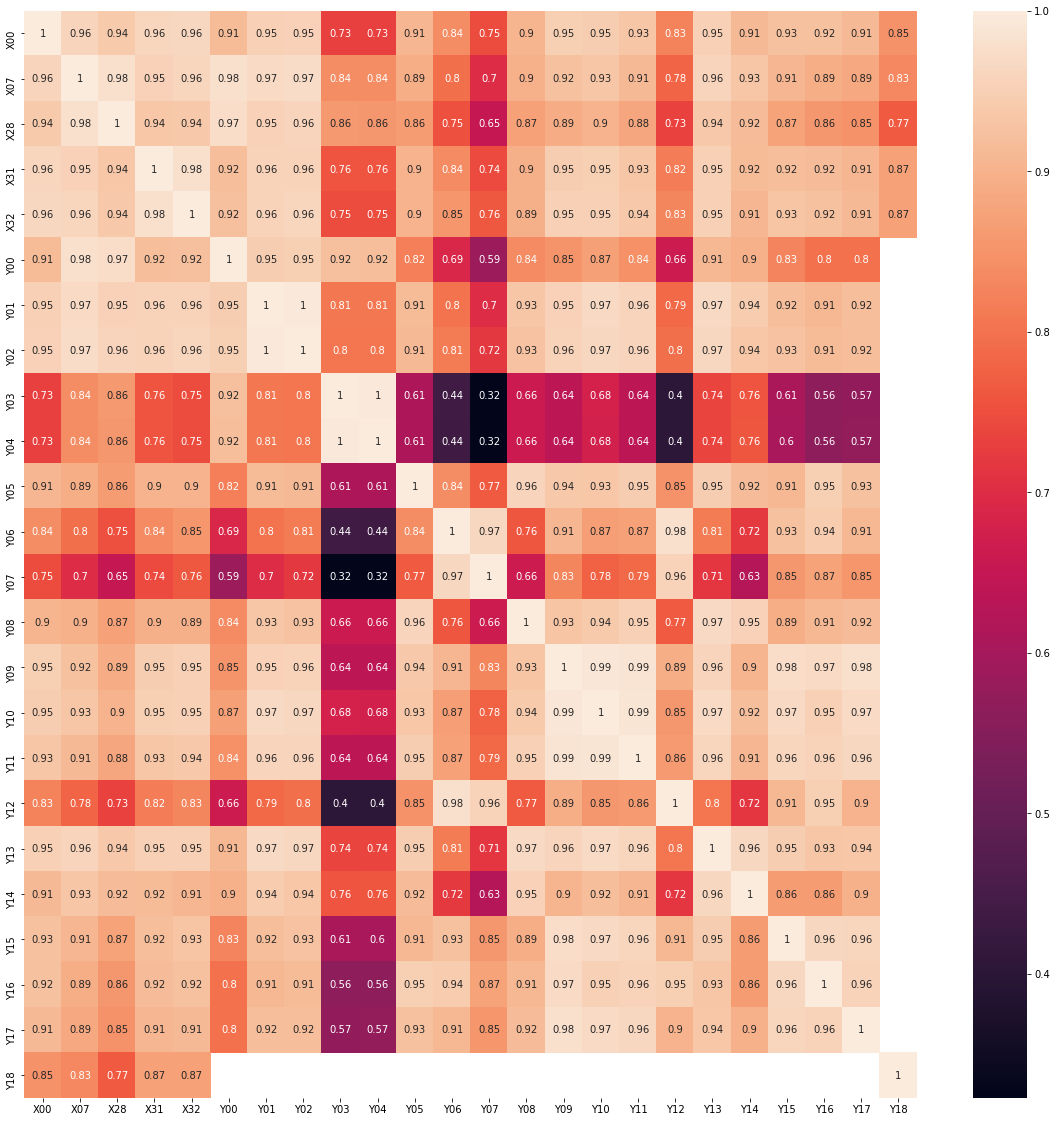

In [25]:
plt.figure(figsize=(20,20))
sc1=pd.concat([temp,temp2],axis=1)
c1=sc1.corr()
sns.heatmap(c1,annot=True)

# Temp and Press

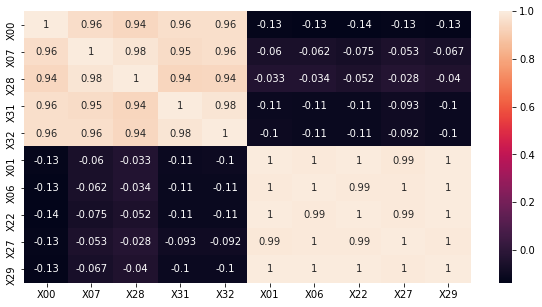

In [33]:
plt.figure(figsize=(10,5))
sc1=pd.concat([temp,press],axis=1)
c1=sc1.corr()
sns.heatmap(c1,annot=True)

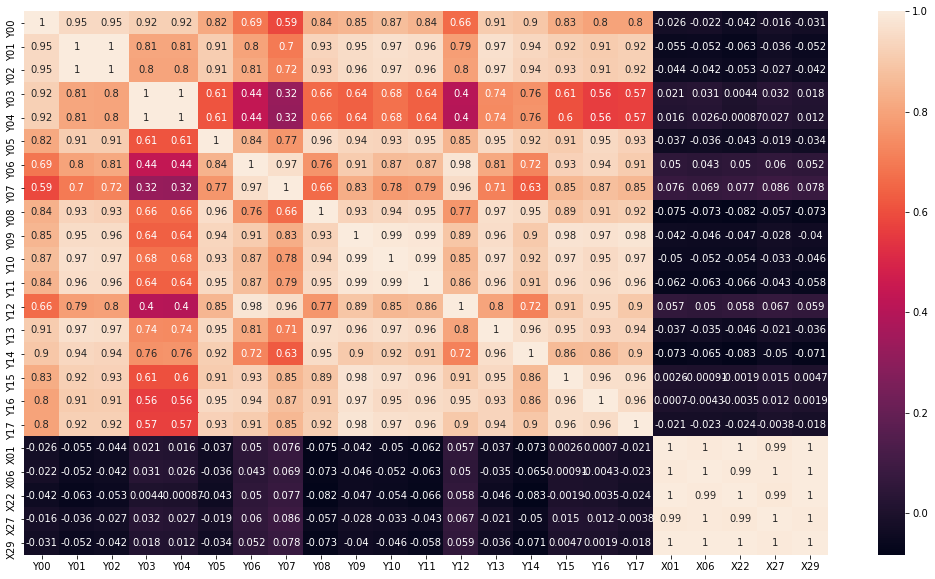

In [34]:
plt.figure(figsize=(18,10))
sc1=pd.concat([temp2,press],axis=1)
c1=sc1.corr()
sns.heatmap(c1,annot=True)

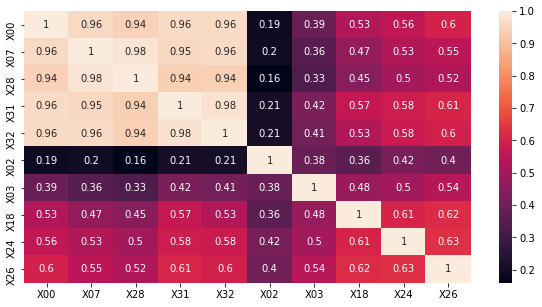

In [35]:
plt.figure(figsize=(10,5))
sc2=pd.concat([temp,winds],axis=1)
c2=sc2.corr()
sns.heatmap(c2,annot=True)

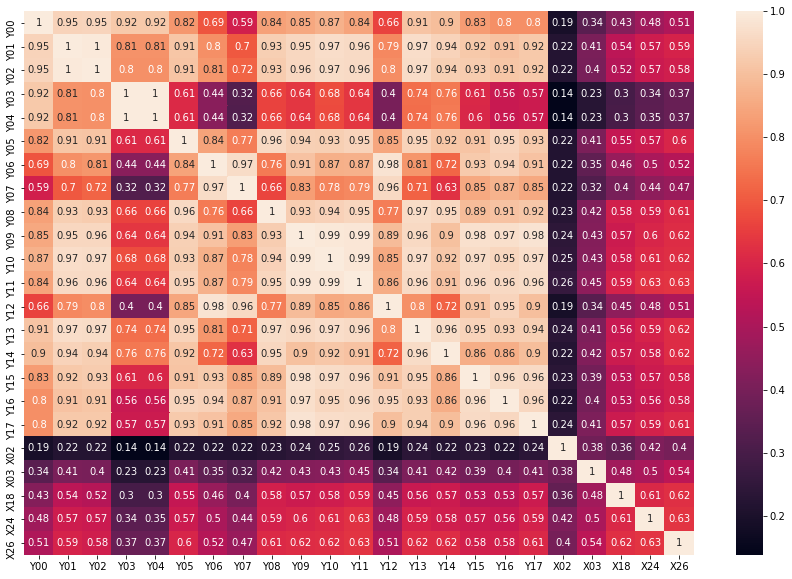

In [36]:
plt.figure(figsize=(15,10))
sc2=pd.concat([temp2,winds],axis=1)
c2=sc2.corr()
sns.heatmap(c2,annot=True)

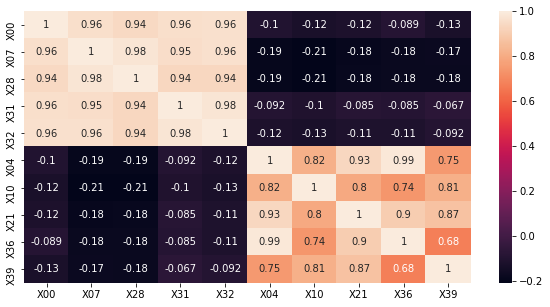

In [37]:
plt.figure(figsize=(10,5))
sc3=pd.concat([temp,precp],axis=1)
c3=sc3.corr()
sns.heatmap(c3,annot=True)

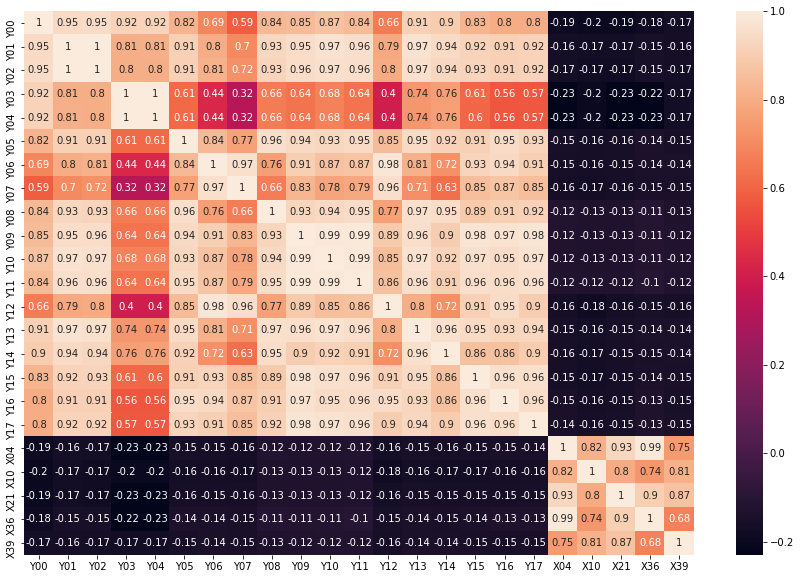

In [38]:
plt.figure(figsize=(15,10))
sc3=pd.concat([temp2,precp],axis=1)
c3=sc3.corr()
sns.heatmap(c3,annot=True)

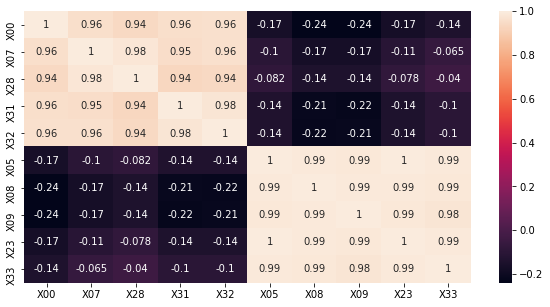

In [39]:
plt.figure(figsize=(10,5))
sc4=pd.concat([temp,press2],axis=1)
c4=sc4.corr()
sns.heatmap(c4,annot=True)

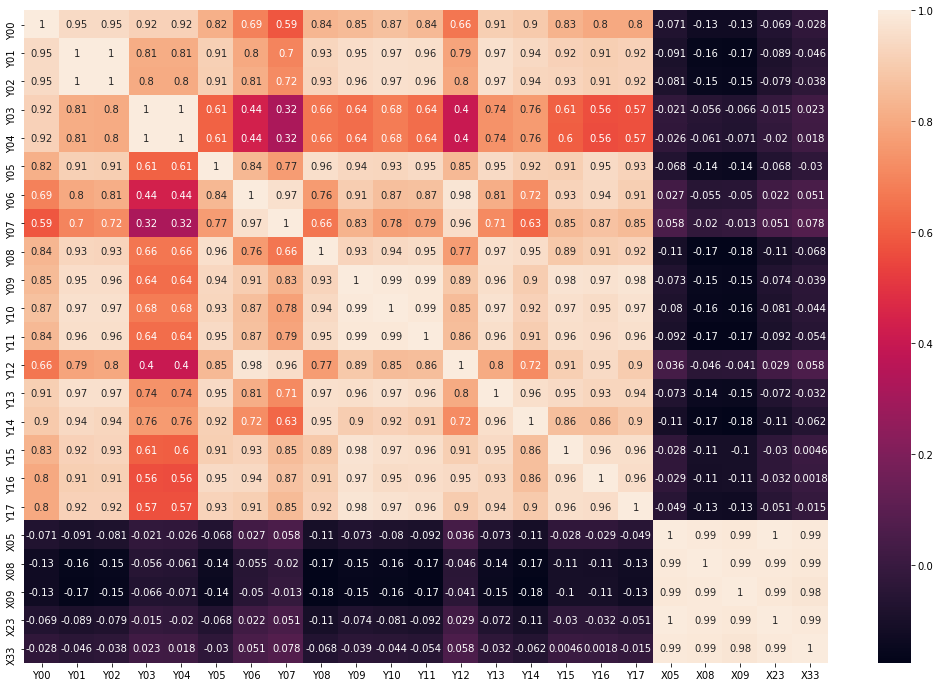

In [40]:
plt.figure(figsize=(18,12))
sc4=pd.concat([temp2,press2],axis=1)
c4=sc4.corr()
sns.heatmap(c4,annot=True)

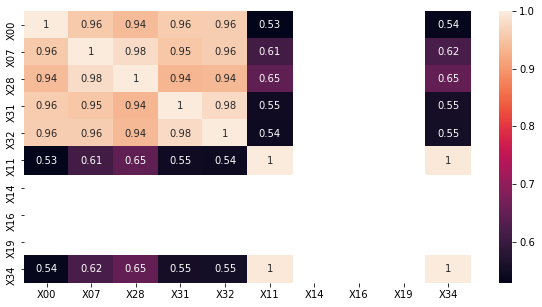

In [41]:
plt.figure(figsize=(10,5))
sc5=pd.concat([temp,solar],axis=1)
c5=sc5.corr()
sns.heatmap(c5,annot=True)

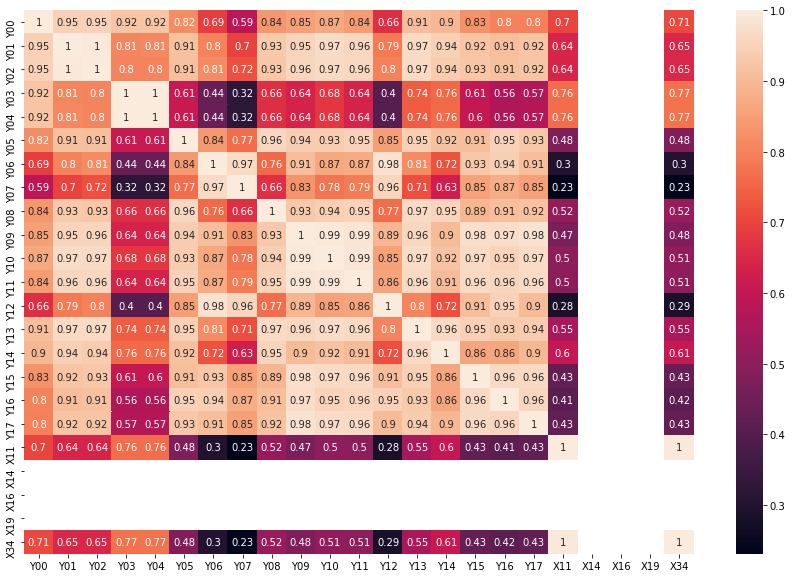

In [42]:
plt.figure(figsize=(15,10))
sc5=pd.concat([temp2,solar],axis=1)
c5=sc5.corr()
sns.heatmap(c5,annot=True)

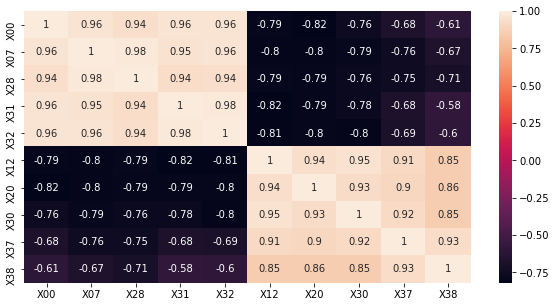

In [43]:
plt.figure(figsize=(10,5))
sc6=pd.concat([temp,humid],axis=1)
c6=sc6.corr()
sns.heatmap(c6,annot=True)

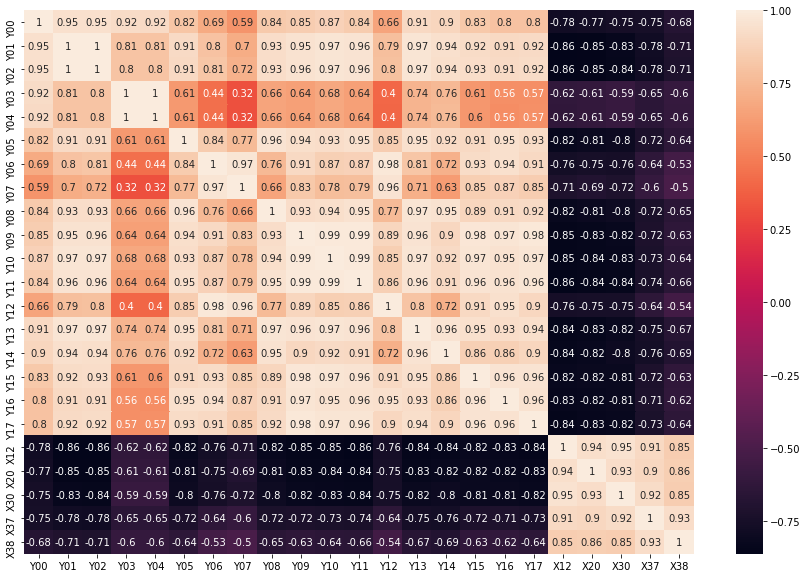

In [44]:
plt.figure(figsize=(15,10))
sc6=pd.concat([temp2,humid],axis=1)
c6=sc6.corr()
sns.heatmap(c6,annot=True)

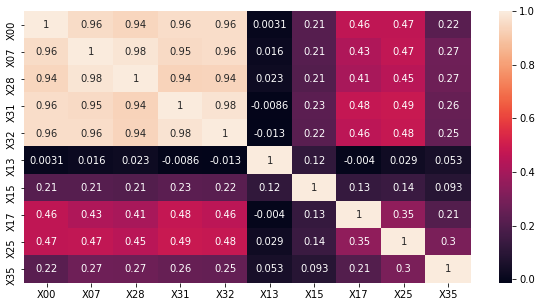

In [45]:
plt.figure(figsize=(10,5))
sc7=pd.concat([temp,wdirec],axis=1)
c7=sc7.corr()
sns.heatmap(c7,annot=True)

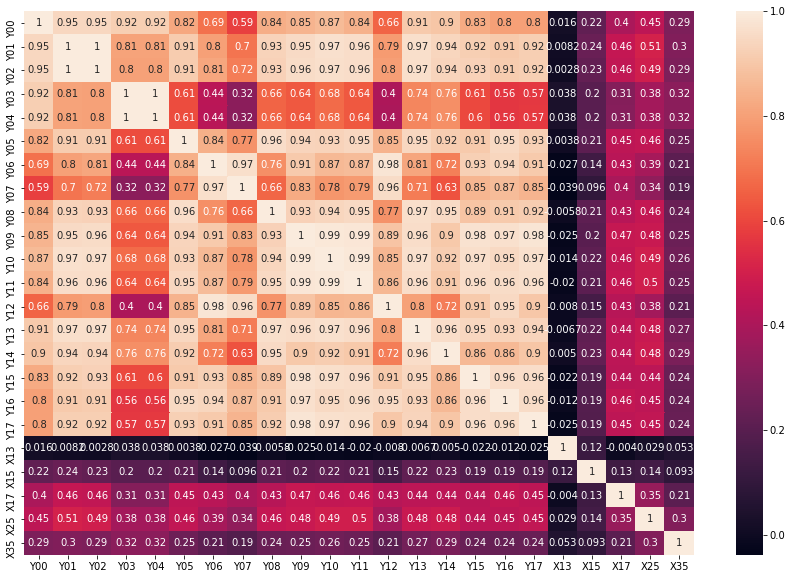

In [46]:
plt.figure(figsize=(15,10))
sc7=pd.concat([temp2,wdirec],axis=1)
c7=sc7.corr()
sns.heatmap(c7,annot=True)

In [47]:
sens='SenTemp'

In [48]:
train_tmp = train_tmp.rename(columns={'X00':name1+'1', 'X07':name1+'2', 'X28':name1+'3', 'X31':name1+'4', 'X32':name1+'5'})
train_tmp = train_tmp.rename(columns={'X01':name2+'1', 'X06':name2+'2', 'X22':name2+'3', 'X27':name2+'4', 'X29':name2+'5'})
train_tmp = train_tmp.rename(columns={'X02':name3+'1', 'X03':name3+'2', 'X18':name3+'3', 'X24':name3+'4', 'X26':name3+'5'})
train_tmp = train_tmp.rename(columns={'X04':name4+'1', 'X10':name4+'2', 'X21':name4+'3', 'X36':name4+'4', 'X39':name4+'5'})
train_tmp = train_tmp.rename(columns={'X05':name5+'1', 'X08':name5+'2', 'X09':name5+'3', 'X23':name5+'4', 'X33':name5+'5'})
train_tmp = train_tmp.rename(columns={'X11':name6+'1', 'X14':name6+'2', 'X16':name6+'3', 'X19':name6+'4', 'X34':name6+'5'})
train_tmp = train_tmp.rename(columns={'X12':name7+'1', 'X20':name7+'2', 'X30':name7+'3', 'X37':name7+'4', 'X38':name7+'5'})
train_tmp = train_tmp.rename(columns={'X13':name8+'1', 'X15':name8+'2', 'X17':name8+'3', 'X25':name8+'4', 'X35':name8+'5'})

In [49]:
train_tmp = train_tmp.rename(columns={'Y00':sens+'1', 'Y01':sens+'2', 'Y02':sens+'3', 'Y03':sens+'4', 'Y04':sens+'5', 'Y05':sens+'6', 'Y06':sens+'7', \
                                                'Y07':sens+'8','Y08':sens+'9', 'Y09':sens+'10', 'Y10':sens+'11', 'Y11':sens+'12','Y12':sens+'13', 'Y13':sens+'14', \
                                                'Y14':sens+'15', 'Y15':sens+'16', 'Y16':sens+'17', 'Y17':sens+'18'})

In [50]:
#train_['X10']

In [51]:
# pr1=test.profile_report()
# pr1.to_file('./test_report.html') # pr_report.html 파일로 저장

# pr2=train.profile_report()
# pr2.to_file('./train_report.html') # pr_report.html 파일로 저장

In [52]:
# corr = train.corr()
# cmap = sns.color_palette("Blues")
# f, ax = plt.subplots(figsize=(20, 12))
# sns.heatmap(corr, cmap=cmap, annot=True, fmt = ".2f")

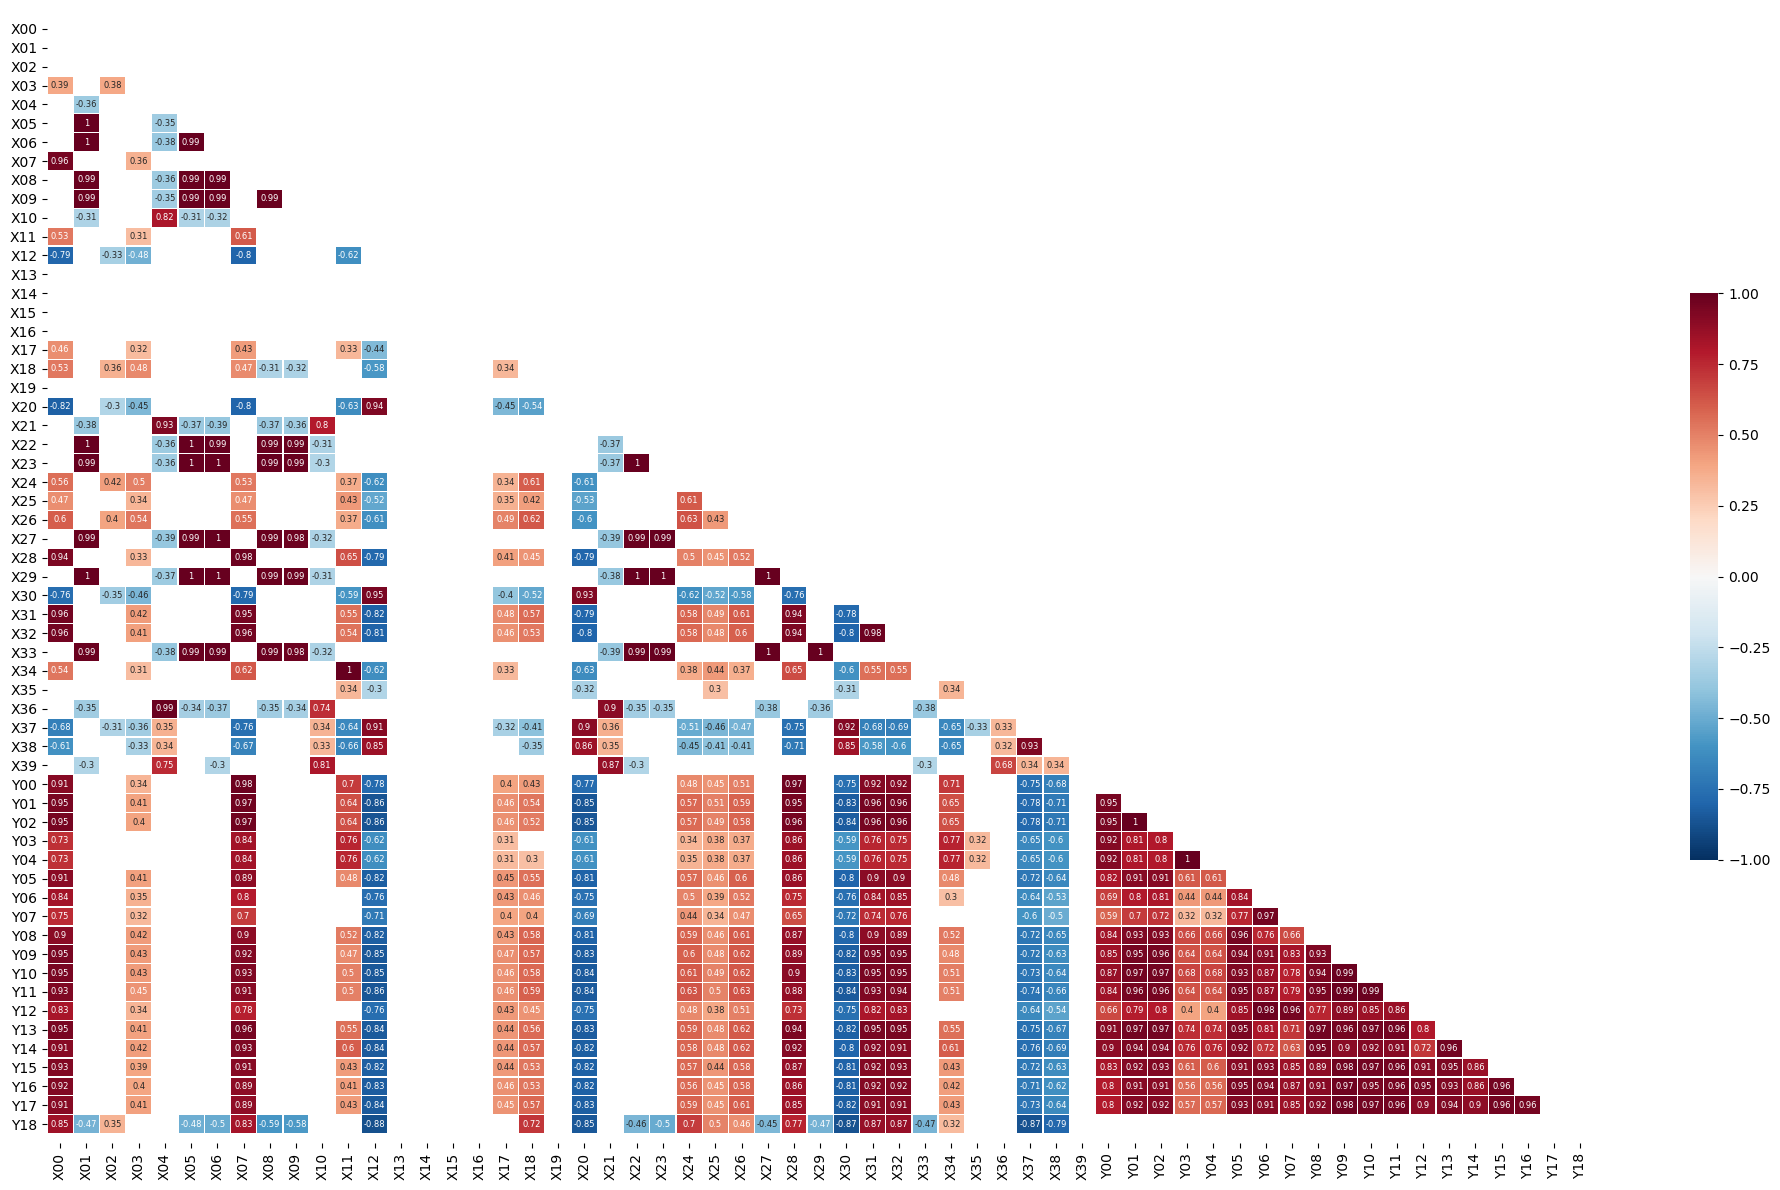

In [53]:
fig, ax = plt.subplots(figsize=(20, 12), dpi=100)

data = train.corr()
mask = np.triu(np.ones_like(data, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(data[(data >= 0.3) | (data <= -0.3)], 
            mask=mask,
            vmax=1.0, vmin=-1.0, 
            cmap='RdBu_r', linewidths=0.2,
            annot=True, annot_kws={'size': 6}, 
            square=False, cbar=True,
            cbar_kws={'shrink': .5}, ax=ax)

# for _, spine in ax.spines.items():
#     spine.set_visible(True)
ax.set_ylim(ax.get_ylim()[0]+0.5, ax.get_ylim()[1]-0.5)
fig.tight_layout()
plt.show()

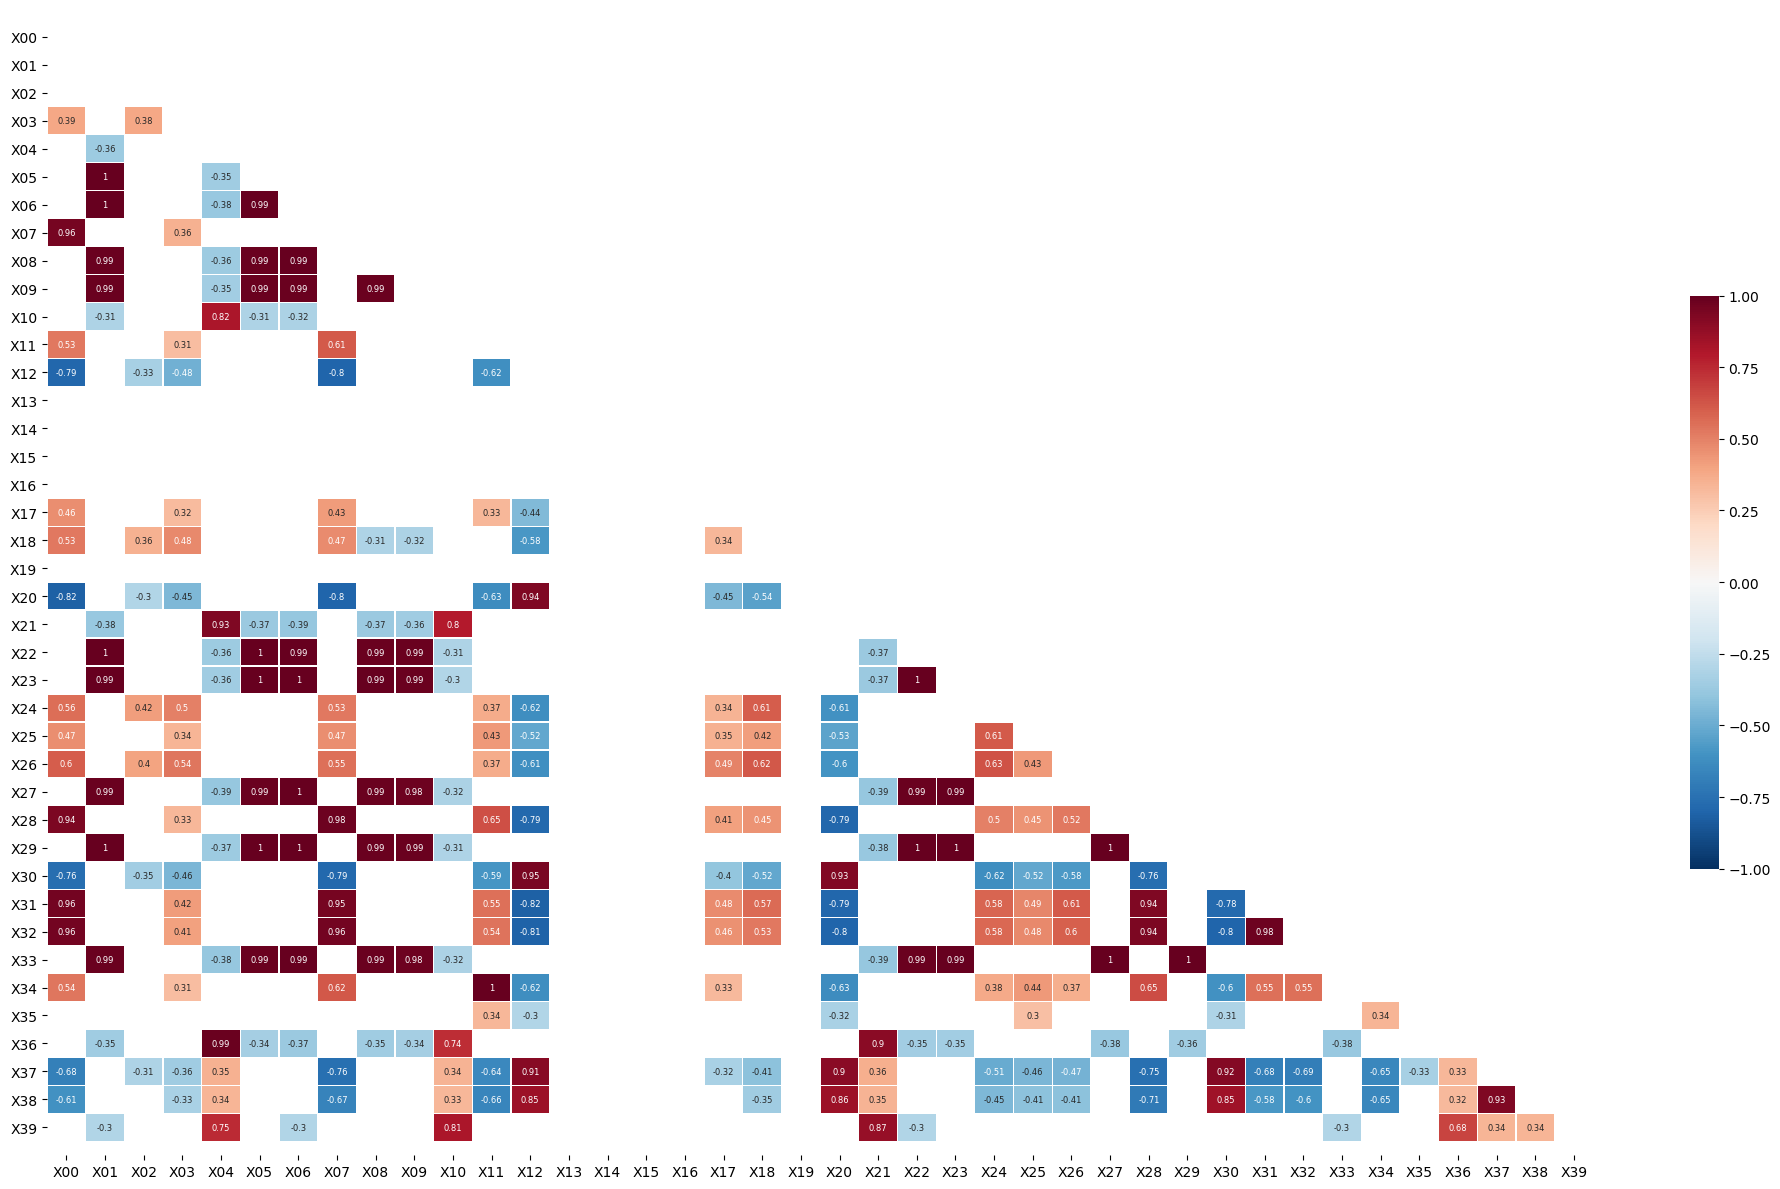

In [54]:
fig, ax = plt.subplots(figsize=(20, 12), dpi=100)

data = train.iloc[:,:40].corr()
mask = np.triu(np.ones_like(data, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(data[(data >= 0.3) | (data <= -0.3)], 
            mask=mask,
            vmax=1.0, vmin=-1.0, 
            cmap='RdBu_r', linewidths=0.2,
            annot=True, annot_kws={'size': 6}, 
            square=False, cbar=True,
            cbar_kws={'shrink': .5}, ax=ax)

# for _, spine in ax.spines.items():
#     spine.set_visible(True)
ax.set_ylim(ax.get_ylim()[0]+0.5, ax.get_ylim()[1]-0.5)
fig.tight_layout()
plt.show()

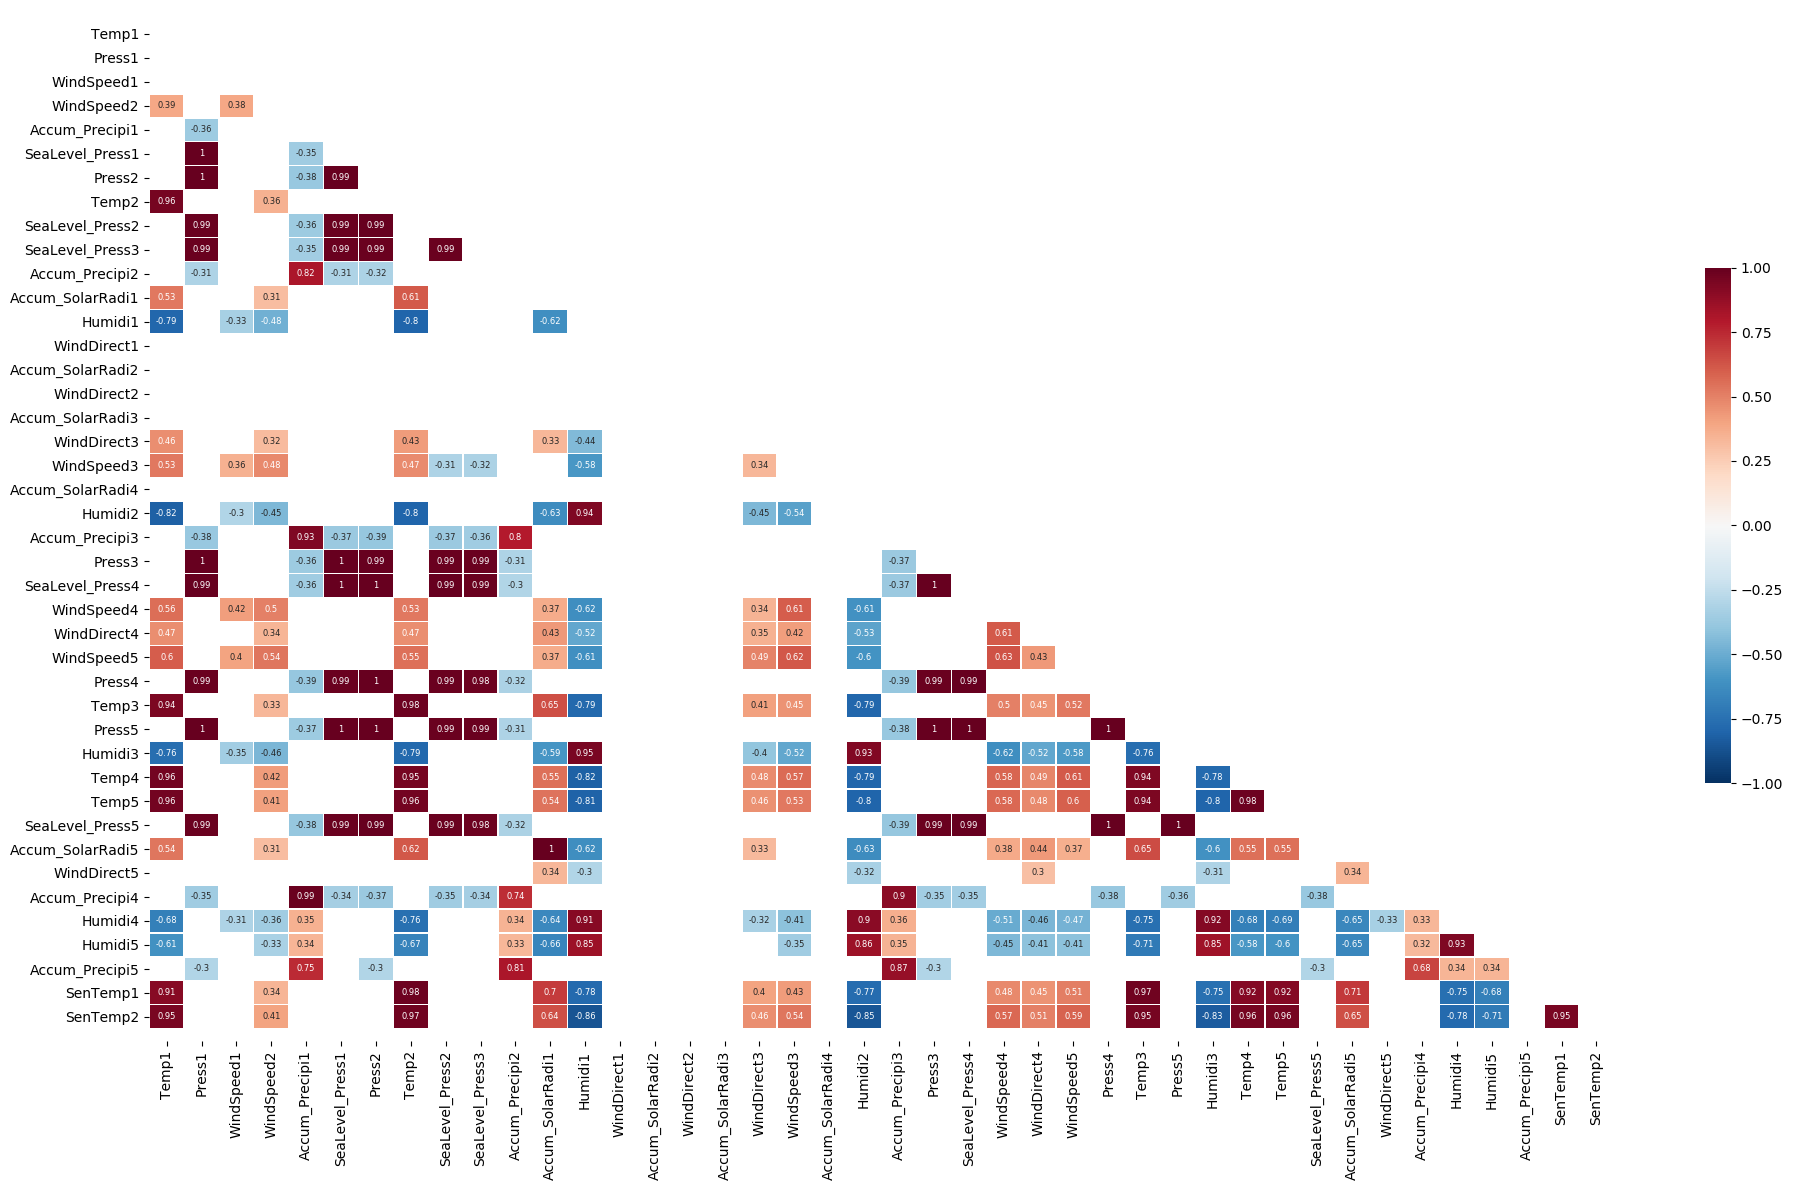

In [55]:
fig, ax = plt.subplots(figsize=(20, 12), dpi=100)

data = train_tmp.iloc[:,:42].corr()
mask = np.triu(np.ones_like(data, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(data[(data >= 0.3) | (data <= -0.3)], 
            mask=mask,
            vmax=1.0, vmin=-1.0, 
            cmap='RdBu_r', linewidths=0.2,
            annot=True, annot_kws={'size': 6}, 
            square=False, cbar=True,
            cbar_kws={'shrink': .5}, ax=ax)

# for _, spine in ax.spines.items():
#     spine.set_visible(True)
ax.set_ylim(ax.get_ylim()[0]+0.5, ax.get_ylim()[1]-0.5)
fig.tight_layout()
plt.show()

In [68]:
tr_tmp=train_tmp.copy()

In [70]:
tr_tmp.sort_index(axis=1).shape

(4752, 59)

In [56]:
train.head()

X00    X01  X02  X03  X04     X05    X06   X07     X08     X09  ...  Y09  \
id                                                                  ...        
0   9.7  988.8  1.2  0.6  0.0  1009.3  989.6  12.2  1009.9  1009.8  ...  7.0   
1   9.3  988.9  1.7  1.9  0.0  1009.3  989.6  12.1  1010.0  1009.9  ...  6.5   
2   9.4  989.0  1.1  2.3  0.0  1009.2  989.7  12.1  1010.1  1010.1  ...  6.5   
3   9.4  988.9  1.5  0.7  0.0  1009.2  989.6  12.0  1010.0  1010.0  ...  6.0   
4   9.2  988.9  0.8  1.7  0.0  1009.2  989.7  12.0  1010.1  1010.0  ...  6.0   

    Y10  Y11  Y12   Y13  Y14  Y15  Y16  Y17  Y18  
id                                                
0   7.5  7.0  9.0  10.0  9.5  9.0  8.0  9.0  NaN  
1   7.5  7.0  8.5  10.0  9.5  9.0  7.5  9.0  NaN  
2   7.5  6.5  8.0   9.5  9.5  8.5  7.5  8.5  NaN  
3   7.0  6.0  8.0   9.5  9.0  8.5  7.5  8.5  NaN  
4   7.0  6.0  7.5   9.5  9.0  8.5  7.5  8.5  NaN  

[5 rows x 59 columns]

In [57]:
s1=train[['X00','Y00','Y01','Y02','Y03','Y04','Y05','Y06','Y07','Y08','Y09','Y10',\
               'Y11','Y12','Y13','Y14','Y15','Y16','Y17'] ]
#s1=train[['X00','X07','X28','X31','X32','Y00','Y01','Y02','Y03','Y04','Y05','Y06','Y07','Y08','Y09','Y10',\
#               'Y11','Y12','Y13','Y14','Y15','Y16','Y17'] ]

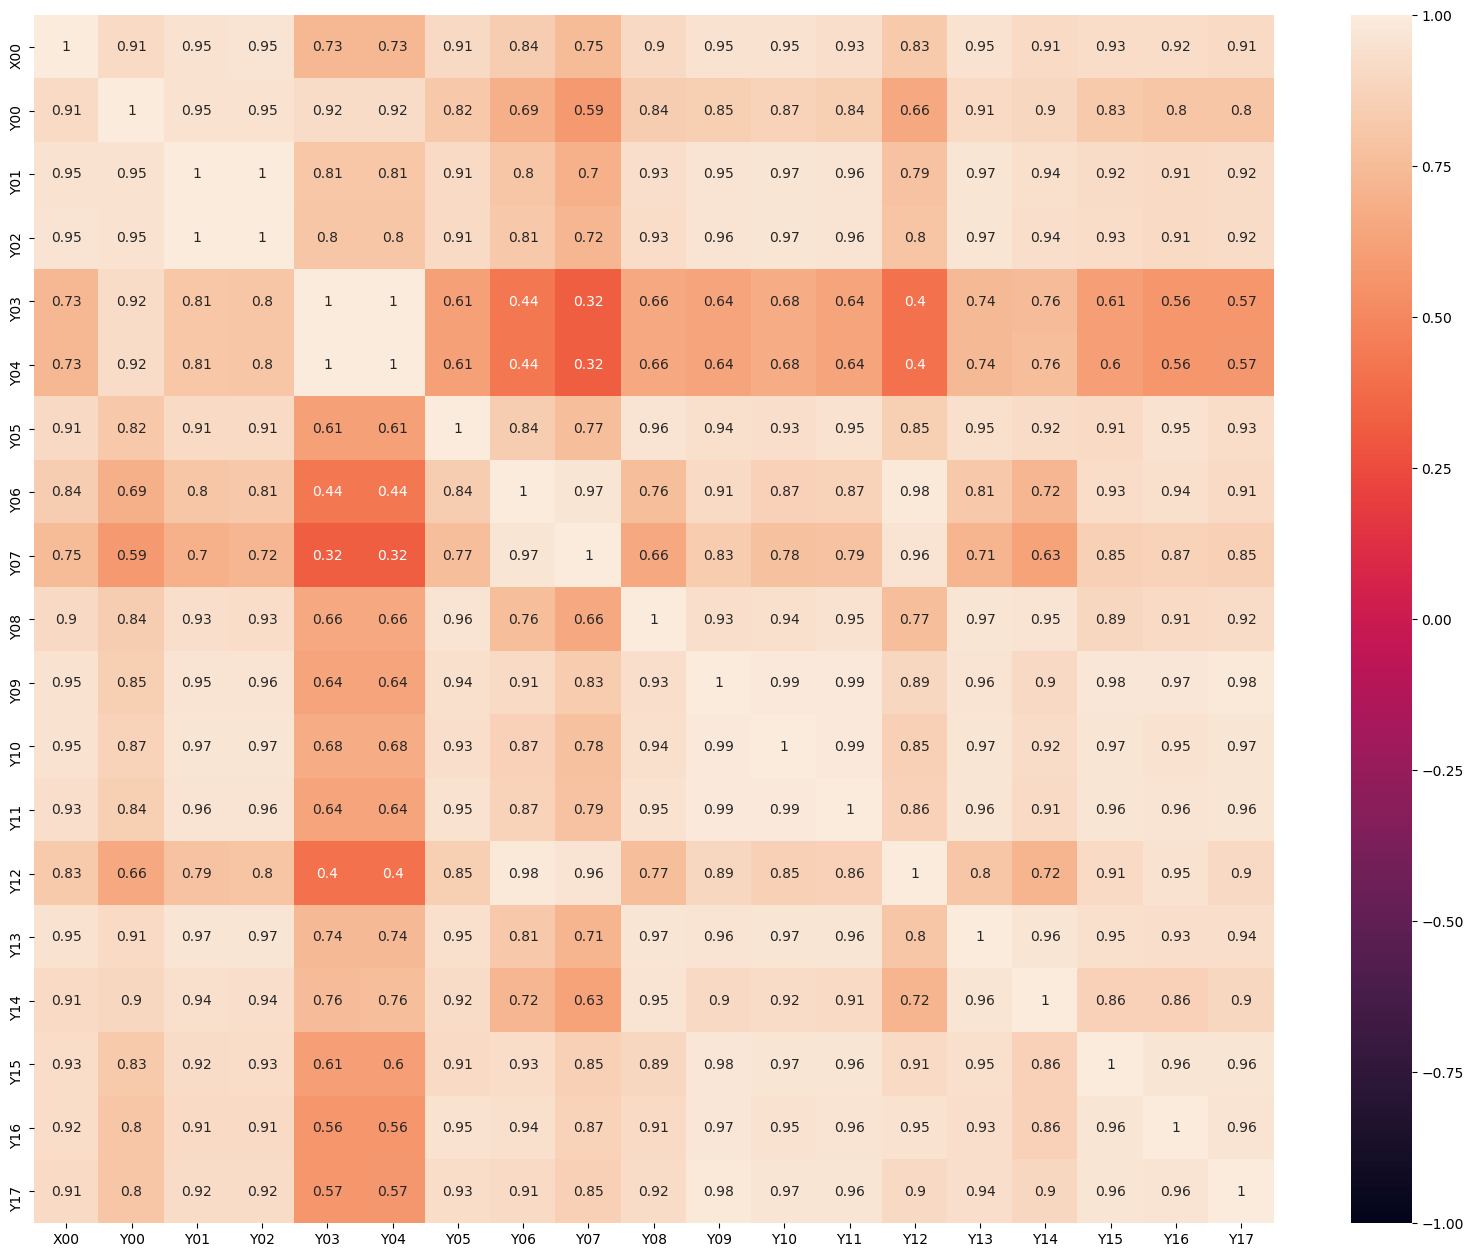

In [58]:
fig, ax = plt.subplots(figsize=(20, 16), dpi=100)
s1c=s1.corr()
sns.heatmap(s1c,vmin=-1,vmax=1,annot=True)

In [59]:
#print(train['X00'],train['X07'],train['X28'],train['X31'],train['X32'],train['Y18'])
#print(train[['X00','X07','X28','X31','X32','Y18']])

s1=train['X00']
s2=train['X07']
s3=train['X28']
s4=train['X31']
s5=train['X32']

s6=train['Y18']

# for k,i in enumerate(range(4318,4752)):
#     print(i,s1[i],s6[i])
    
p0=train['Y00']
p1=train['Y01']
p2=train['Y02']
p3=train['Y03']
p4=train['Y04']
p5=train['Y05']
p6=train['Y06']
p7=train['Y07']
p8=train['Y08']
p9=train['Y09']
p10=train['Y10']
p11=train['Y11']
p12=train['Y12']
p13=train['Y13']
p14=train['Y14']
p15=train['Y15']
p16=train['Y16']
p17=train['Y17']
p18=train['Y18']

for k,i in enumerate(range(0,1000)):
    print(s1[i],s2[i],s3[i],s4[i],s5[i],'    ',p1[i],p2[i],p3[i],p4[i],p5[i],p6[i],p7[i],p8[i],p9[i],p10[i],p11[i],p12[i],p13[i],p14[i],p15[i],p16[i],p17[i])


9.7 12.2 12.3 8.2 10.7      11.5 11.0 20.0 20.0 10.5 10.0 10.5 10.0 7.0 7.5 7.0 9.0 10.0 9.5 9.0 8.0 9.0
9.3 12.1 12.1 8.3 10.3      11.0 11.0 20.0 20.0 10.0 9.5 10.0 9.5 6.5 7.5 7.0 8.5 10.0 9.5 9.0 7.5 9.0
9.4 12.1 12.1 8.0 9.7      11.0 11.0 19.5 19.5 10.0 9.0 10.0 9.0 6.5 7.5 6.5 8.0 9.5 9.5 8.5 7.5 8.5
9.4 12.0 12.1 7.7 9.4      11.0 11.0 19.5 19.5 9.5 9.0 9.5 9.0 6.0 7.0 6.0 8.0 9.5 9.0 8.5 7.5 8.5
9.2 12.0 12.0 7.4 9.4      10.5 10.5 19.0 19.5 9.5 8.5 9.5 8.5 6.0 7.0 6.0 7.5 9.5 9.0 8.5 7.5 8.5
9.1 12.0 12.0 7.3 9.1      10.5 10.5 19.0 19.0 9.5 8.5 9.5 8.5 6.0 7.0 6.0 7.5 9.0 9.0 8.5 7.0 8.5
9.1 12.0 11.8 7.1 8.6      10.0 10.0 19.0 19.0 9.0 8.0 9.0 8.5 5.5 6.5 5.5 7.5 9.0 8.5 8.0 7.0 8.0
8.9 11.9 11.8 7.1 8.8      10.0 10.0 19.0 19.0 9.0 8.0 9.0 8.5 5.5 6.0 5.5 7.5 9.0 8.5 8.0 7.0 8.0
9.0 11.9 11.6 7.0 8.8      10.0 10.0 19.0 19.0 9.0 8.0 9.0 8.0 5.0 6.0 5.0 7.0 9.0 8.5 8.0 7.0 8.0
8.8 11.8 11.5 7.1 8.5      10.0 9.5 18.5 18.5 9.0 8.0 9.0 8.0 4.5 5.5 5.0 7.0 8.5 8.5 8.0 7.0 8.0

23.8 24.2 24.5 24.0 22.8      30.5 29.5 23.5 23.5 36.5 26.0 28.5 39.5 30.5 33.5 41.0 31.0 30.5 29.5 32.0 32.0 31.5
23.8 24.2 24.6 24.0 22.7      30.0 30.0 24.0 24.0 37.0 26.0 28.0 40.5 31.0 34.0 41.0 29.5 30.0 30.0 32.5 31.0 31.5
23.8 24.3 24.9 23.6 23.5      30.0 30.5 24.0 24.0 38.5 26.0 27.5 41.5 31.0 33.5 40.5 26.5 29.5 29.5 32.0 31.0 31.5
24.3 24.4 25.1 24.0 23.5      30.5 30.0 24.0 24.0 39.0 25.5 27.0 39.5 30.5 33.5 41.0 26.5 29.0 30.5 31.5 33.0 32.5
24.1 24.6 25.0 23.2 22.9      31.0 29.5 24.0 24.0 39.0 25.0 27.0 39.5 30.0 33.5 40.5 26.5 29.5 31.0 28.5 33.5 33.5
23.7 24.5 25.3 23.7 22.9      31.0 29.5 24.5 24.5 40.0 25.0 26.5 40.0 30.5 33.5 40.5 26.5 29.5 31.5 27.5 32.5 33.5
23.6 24.6 25.1 23.8 23.4      31.0 29.5 24.5 24.5 42.0 24.5 26.5 41.0 31.0 33.5 40.0 26.5 29.5 31.5 26.0 34.0 33.0
24.1 24.4 25.0 24.1 22.9      30.5 30.0 24.5 24.5 42.0 24.5 26.5 43.5 31.0 33.5 40.0 26.0 28.0 32.5 25.5 33.0 33.0
23.7 24.4 24.7 23.9 23.3      31.0 30.0 24.5 24.5 43.5 24.0 26.5 45.0 31.0 33.5 

20.9 21.6 21.1 21.1 22.0      24.0 25.0 20.5 20.5 26.0 34.0 44.5 22.5 27.0 27.0 30.0 32.0 21.0 20.5 28.0 26.5 33.0
21.4 21.9 21.4 21.6 22.8      24.5 25.5 20.5 20.5 26.5 33.5 44.5 23.0 27.5 27.5 30.5 32.5 21.5 21.0 28.0 27.5 33.5
21.2 22.1 22.7 21.5 23.0      25.0 26.0 21.0 20.5 27.0 32.0 45.0 23.5 28.5 28.5 32.0 33.5 22.0 21.0 28.0 27.5 34.5
21.3 22.1 22.9 21.3 23.4      26.0 27.0 21.0 20.5 27.0 32.5 44.0 24.0 29.0 29.5 33.0 34.0 22.5 21.5 27.5 28.5 34.0
21.8 22.4 22.6 22.8 23.5      26.5 27.5 21.0 21.0 27.0 33.0 42.5 24.0 29.5 30.0 34.0 34.0 23.0 22.0 27.5 28.5 34.5
21.8 22.9 23.6 22.7 24.3      27.0 28.0 21.5 21.0 28.0 34.0 42.0 24.5 30.0 31.0 35.0 34.0 23.5 22.5 28.0 29.0 36.0
22.7 23.1 23.5 23.4 25.0      27.5 28.5 21.5 21.5 28.0 35.0 41.5 25.0 30.5 32.0 36.0 34.0 24.0 23.0 28.0 29.5 35.5
22.8 23.1 24.1 23.8 25.0      28.5 29.0 22.0 21.5 29.0 36.0 39.0 26.0 31.0 32.5 37.0 35.5 24.5 23.5 28.0 31.0 35.5
22.8 23.2 23.8 24.1 24.9      29.0 29.0 22.0 22.0 29.0 36.5 38.5 26.0 31.0 33.0 

20.9 21.6 21.1 20.5 21.7      21.5 22.5 21.5 21.0 28.0 31.0 44.0 22.5 25.0 23.0 25.0 36.0 21.0 20.5 22.0 28.0 28.0
20.9 21.7 20.7 21.1 22.5      22.5 23.5 21.5 21.5 28.5 35.0 46.0 23.0 26.5 24.5 26.5 37.0 21.0 20.5 24.5 28.5 30.5
21.8 22.1 21.2 21.4 23.0      23.0 24.0 21.5 21.5 28.5 36.0 46.5 23.0 27.5 26.0 27.5 36.0 21.5 21.0 27.5 28.0 31.5
21.7 22.1 21.3 21.3 23.3      24.0 25.0 22.0 21.5 29.0 39.0 47.5 23.5 28.5 27.5 29.0 38.0 21.5 21.0 29.0 30.0 32.0
21.6 22.3 22.1 21.6 23.9      24.5 25.5 22.0 22.0 28.5 39.0 46.0 23.5 29.0 28.5 30.0 36.0 22.0 21.5 29.0 29.0 33.5
22.5 22.4 22.2 22.6 23.4      25.0 26.0 22.0 22.0 28.5 39.0 46.5 24.0 29.5 29.5 31.0 36.0 22.5 22.0 30.0 28.5 34.0
22.3 22.6 22.1 22.4 23.7      25.5 26.5 22.5 22.5 28.5 38.5 46.5 24.0 30.0 30.5 32.0 35.0 22.5 22.0 29.5 29.0 34.5
23.0 23.0 22.4 22.6 24.3      26.5 27.0 22.5 22.5 29.0 36.5 47.0 24.5 30.0 31.5 33.0 36.5 23.0 22.5 29.5 30.0 34.5
23.3 23.2 23.1 23.3 24.2      27.0 27.5 22.5 22.5 29.5 35.5 45.5 25.0 30.5 32.0 

14.3 16.4 17.7 11.9 11.9      14.5 14.5 21.0 20.5 16.5 14.5 15.0 15.0 12.0 11.5 11.0 17.5 14.5 14.5 14.5 15.0 14.0
14.7 16.5 18.1 12.2 12.6      14.5 14.5 21.0 20.5 17.0 15.0 15.5 15.5 12.0 12.0 11.0 19.0 14.5 14.5 15.0 16.0 14.5
15.1 16.7 18.3 12.9 12.7      15.0 15.0 21.0 20.5 17.5 15.5 17.0 16.0 12.5 12.0 11.5 20.5 15.0 15.0 15.0 18.0 14.5
15.4 16.9 18.3 13.5 13.3      15.0 15.0 21.0 20.5 18.5 17.0 18.5 16.5 13.0 12.5 12.0 22.5 15.5 15.5 16.0 19.5 15.0
15.9 17.3 18.7 13.9 13.4      15.5 15.5 21.0 20.5 20.0 17.5 20.5 17.0 13.0 12.5 12.0 24.5 15.5 15.5 16.5 20.5 15.5
16.3 17.5 19.2 14.4 13.9      15.5 15.5 21.0 20.5 21.0 18.5 21.0 17.5 13.5 13.0 12.5 26.0 16.0 16.0 16.5 22.0 16.0
16.8 17.8 19.5 14.6 14.3      16.0 16.0 21.0 21.0 22.0 21.0 21.5 18.0 14.0 13.0 13.5 27.5 16.5 16.5 17.0 23.0 16.5
17.4 18.2 19.7 15.3 15.0      16.0 16.5 21.0 21.0 22.5 23.5 22.5 19.0 14.5 13.5 14.5 28.5 16.5 16.5 17.5 23.5 17.0
17.3 18.7 20.2 15.8 15.7      16.5 17.0 21.0 21.0 23.5 27.0 23.5 19.5 15.0 14.0 

22.2 27.7 29.0 26.3 26.6      32.0 32.0 31.5 32.0 28.0 26.0 27.0 28.0 27.5 30.5 30.0 27.0 25.0 25.5 25.0 27.0 25.0
21.8 27.4 28.6 27.0 25.7      31.5 32.0 31.5 32.0 27.5 25.5 26.5 27.5 27.0 30.0 29.5 26.5 24.5 25.0 24.5 26.5 24.5
21.6 27.1 28.2 26.8 25.3      30.5 31.0 31.5 31.5 27.0 25.0 26.0 27.0 26.0 29.0 29.0 26.0 24.0 24.0 24.0 26.0 24.0
21.0 26.8 28.0 25.8 24.8      30.0 30.5 31.5 31.5 26.5 24.5 25.5 26.5 25.5 28.5 28.0 26.0 23.5 23.5 23.5 26.0 23.5
21.0 26.4 27.5 24.5 24.3      29.5 30.0 31.0 31.5 26.0 24.5 25.5 26.0 25.5 28.0 27.5 25.5 23.5 23.5 23.5 25.5 23.0
20.8 26.2 27.2 24.2 23.6      29.0 29.5 31.0 31.5 26.0 24.0 25.5 26.0 25.0 27.5 27.0 25.5 23.0 23.0 23.0 25.5 22.5
20.6 25.8 27.1 23.5 23.3      28.5 29.0 31.0 31.0 26.0 24.0 25.0 26.0 25.0 27.5 26.5 25.5 23.0 23.0 22.5 25.5 22.0
20.6 25.6 26.7 23.0 23.1      28.5 28.5 31.0 31.0 25.5 24.0 25.0 25.5 24.5 27.0 26.0 25.0 22.5 22.5 22.5 25.0 22.0
19.9 25.3 26.5 23.0 23.0      28.0 28.0 30.5 30.5 25.5 23.5 25.0 25.5 24.5 26.5 

26.7 29.3 30.2 29.2 28.3      36.5 34.5 30.5 30.5 41.5 31.5 32.0 40.0 34.5 39.5 41.5 34.5 32.0 34.0 30.5 38.5 37.0
26.7 29.3 29.9 29.1 28.8      36.5 34.5 30.5 30.5 44.5 30.5 31.5 42.5 35.0 40.0 41.5 34.0 31.0 35.5 30.0 36.5 38.0
27.5 29.3 29.9 29.3 28.5      36.0 34.0 30.5 31.0 45.0 30.0 31.0 42.0 35.0 40.0 41.5 33.0 30.5 36.0 29.5 35.0 37.5
27.2 29.1 29.7 29.5 27.9      36.0 34.0 30.5 31.0 45.5 29.5 30.5 43.5 34.5 40.0 41.5 32.5 30.5 37.0 29.5 33.5 38.5
26.7 29.4 29.6 29.0 27.6      36.5 34.5 31.0 31.0 45.0 29.0 30.5 46.0 34.5 40.0 41.5 32.5 34.0 39.0 29.5 33.0 40.0
26.5 29.5 29.2 28.9 27.4      36.5 35.0 31.0 31.0 39.0 29.0 30.5 48.0 34.5 40.0 41.5 32.0 33.0 40.0 29.5 32.5 41.5
26.3 29.5 29.0 28.9 27.1      36.5 34.0 31.0 31.5 34.5 28.5 29.5 42.0 34.0 39.5 40.5 31.0 31.5 36.0 28.5 31.5 38.0
26.2 29.3 29.0 29.1 27.7      36.0 33.5 31.0 31.5 33.0 28.0 29.0 39.5 33.0 38.5 39.0 30.5 32.0 34.5 28.0 31.5 36.5
25.9 29.0 29.0 28.3 27.0      36.0 33.5 31.0 31.5 32.0 27.5 28.5 37.0 32.5 37.5 

30.3 32.1 32.3 31.4 32.1      38.5 38.5 30.5 30.0 41.0 35.0 37.0 44.0 40.5 47.0 50.5 36.5 37.0 38.0 39.5 38.0 39.0
30.1 32.2 31.9 31.6 31.0      38.0 38.5 30.5 30.0 42.0 34.5 37.0 45.0 40.0 46.5 50.0 37.0 37.5 38.0 39.5 37.5 39.0
30.0 31.9 32.7 31.7 31.3      38.0 38.0 30.5 30.5 43.0 34.5 36.0 45.0 40.0 46.5 50.0 36.5 38.0 38.5 40.0 37.5 40.0
29.5 31.9 32.4 31.5 31.7      38.0 38.0 30.5 30.5 44.0 34.0 35.5 46.0 40.0 46.5 49.5 35.5 37.5 38.5 40.0 38.0 39.5
29.8 31.8 32.5 31.4 31.1      37.5 38.0 30.5 30.5 45.0 33.5 35.0 47.0 39.5 46.0 49.5 34.0 37.0 38.5 38.5 37.0 39.0
29.7 31.7 32.7 32.4 31.1      37.5 38.5 31.0 30.5 44.5 33.0 34.5 46.0 39.0 45.5 49.0 33.5 36.5 38.5 38.5 37.5 39.0
29.6 31.7 32.6 32.7 30.7      37.5 37.5 31.0 31.0 45.0 33.0 34.0 45.5 38.5 45.0 48.5 34.0 37.0 39.5 36.5 38.0 39.5
29.5 31.3 32.8 32.2 30.8      37.5 38.0 31.0 31.0 44.5 32.5 34.0 45.5 38.5 45.0 48.0 33.5 37.0 39.5 34.5 38.0 39.5
29.6 31.5 32.3 32.1 30.4      37.0 38.0 31.0 31.0 45.5 32.0 33.5 46.0 38.0 44.5 

19.8 20.2 20.2 19.1 19.7      20.5 20.5 22.5 23.0 21.0 20.0 20.5 20.5 20.0 20.5 21.0 20.5 19.5 19.0 20.0 20.0 20.0
20.0 20.3 20.2 19.0 20.1      20.5 20.5 22.5 23.0 21.0 20.0 20.5 20.5 20.0 20.5 21.0 20.0 19.0 19.0 19.5 20.0 20.0
19.7 20.2 20.1 19.0 20.6      20.5 20.5 22.5 23.0 21.0 20.0 20.0 20.5 20.0 20.5 21.0 20.0 19.0 19.0 19.5 20.0 20.0
19.3 20.2 20.1 19.1 20.7      20.5 20.5 22.5 23.0 20.5 20.0 20.0 20.5 20.0 20.5 21.0 20.0 19.5 19.0 19.5 20.0 20.0
19.2 20.2 20.2 19.0 20.8      20.5 20.5 22.5 23.0 21.0 20.5 20.5 20.5 20.0 20.5 21.0 20.5 19.5 19.5 20.0 20.5 20.5
18.7 20.3 20.2 19.1 21.3      20.5 20.5 22.5 23.0 21.0 20.5 20.5 21.0 20.0 20.5 21.0 20.0 19.5 19.5 20.0 20.0 20.5
18.3 20.4 20.5 19.2 21.3      20.5 20.5 22.5 23.0 21.0 20.5 20.5 21.0 20.0 20.5 21.0 20.0 19.5 19.5 20.0 20.5 20.5
18.1 20.5 20.4 19.2 22.2      20.5 20.5 22.5 23.0 21.0 20.5 20.5 20.5 20.0 20.5 21.0 20.0 19.5 19.5 20.0 20.5 20.5
18.1 20.7 20.5 19.4 22.9      20.5 20.5 22.5 23.0 21.0 21.0 21.0 21.0 20.5 21.0 

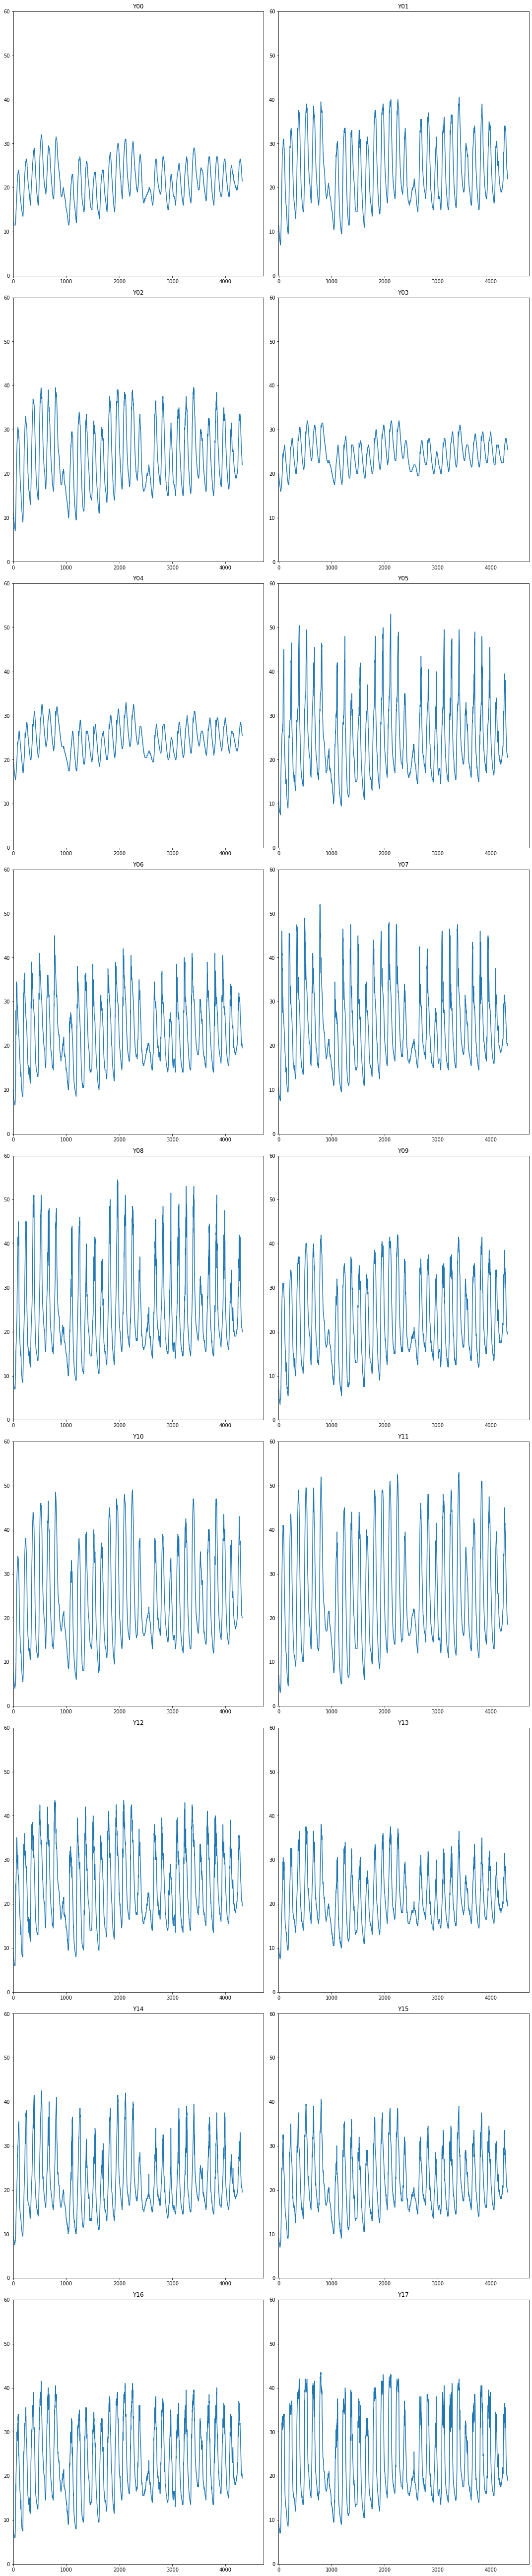

In [60]:
col = train.iloc[:,40:58]
fig = plt.figure(figsize=(15,80))

for i, column in enumerate(col):    
    plt.subplot(10,2,i+1)
    plt.plot(train[column])
    plt.title(column)
    plt.xlim(-1,4720)
    plt.ylim(0,60)
    
fig.tight_layout()
plt.show()

In [61]:
train.tail()

X00    X01  X02  X03  X04     X05    X06   X07     X08     X09  ...  \
id                                                                     ...   
4747  19.9  987.6  0.9  0.8  0.0  1006.9  987.7  21.7  1007.5  1007.4  ...   
4748  19.9  987.6  0.5  0.7  0.0  1006.8  987.7  21.6  1007.5  1007.4  ...   
4749  19.7  987.7  0.9  0.6  0.0  1006.9  987.6  21.4  1007.4  1007.5  ...   
4750  19.4  987.7  0.9  0.8  0.0  1006.9  987.8  21.3  1007.6  1007.5  ...   
4751  19.1  987.6  1.0  0.3  0.0  1006.8  987.8  21.2  1007.5  1007.4  ...   

      Y09  Y10  Y11  Y12  Y13  Y14  Y15  Y16  Y17   Y18  
id                                                       
4747  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  21.5  
4748  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  21.5  
4749  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  21.5  
4750  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  21.5  
4751  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  21.0  

[5 rows x 59 columns]

C:\Users\jungg\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


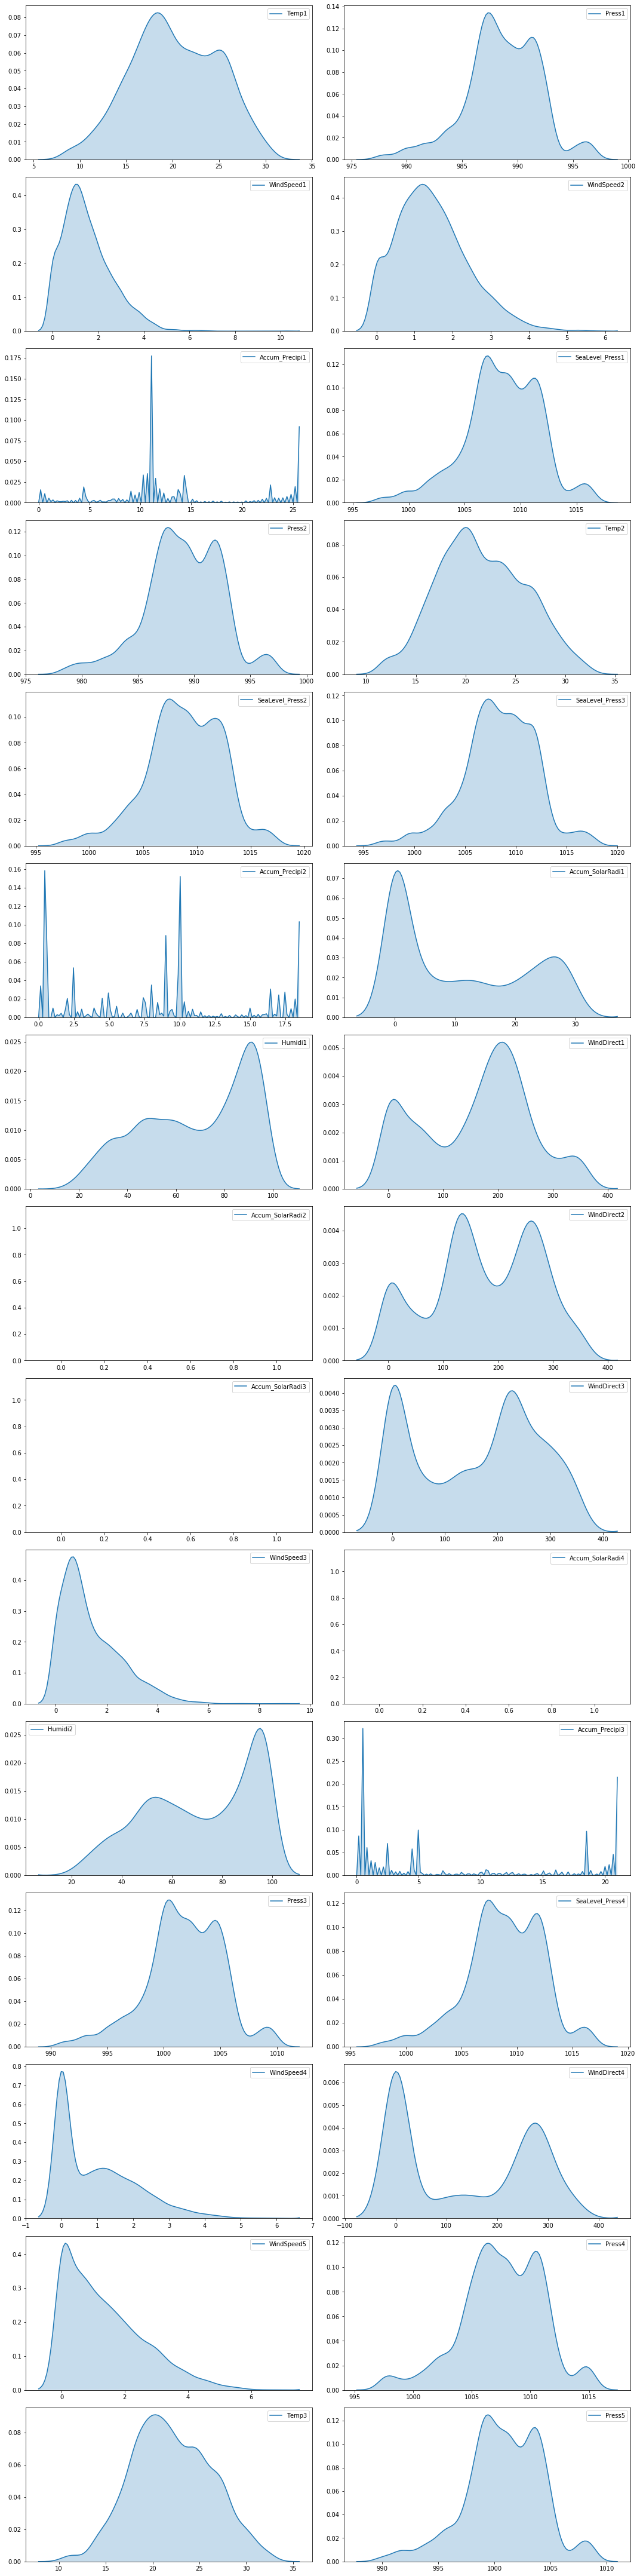

In [62]:
col = train_tmp.columns
fig, axes = plt.subplots(15, 2, figsize=(15,60))

for i, column in enumerate(col):
    try:
        sns.kdeplot(train_tmp[column], shade=True, ax=axes.flat[i])
    except:
        pass
    
fig.tight_layout()
plt.show()

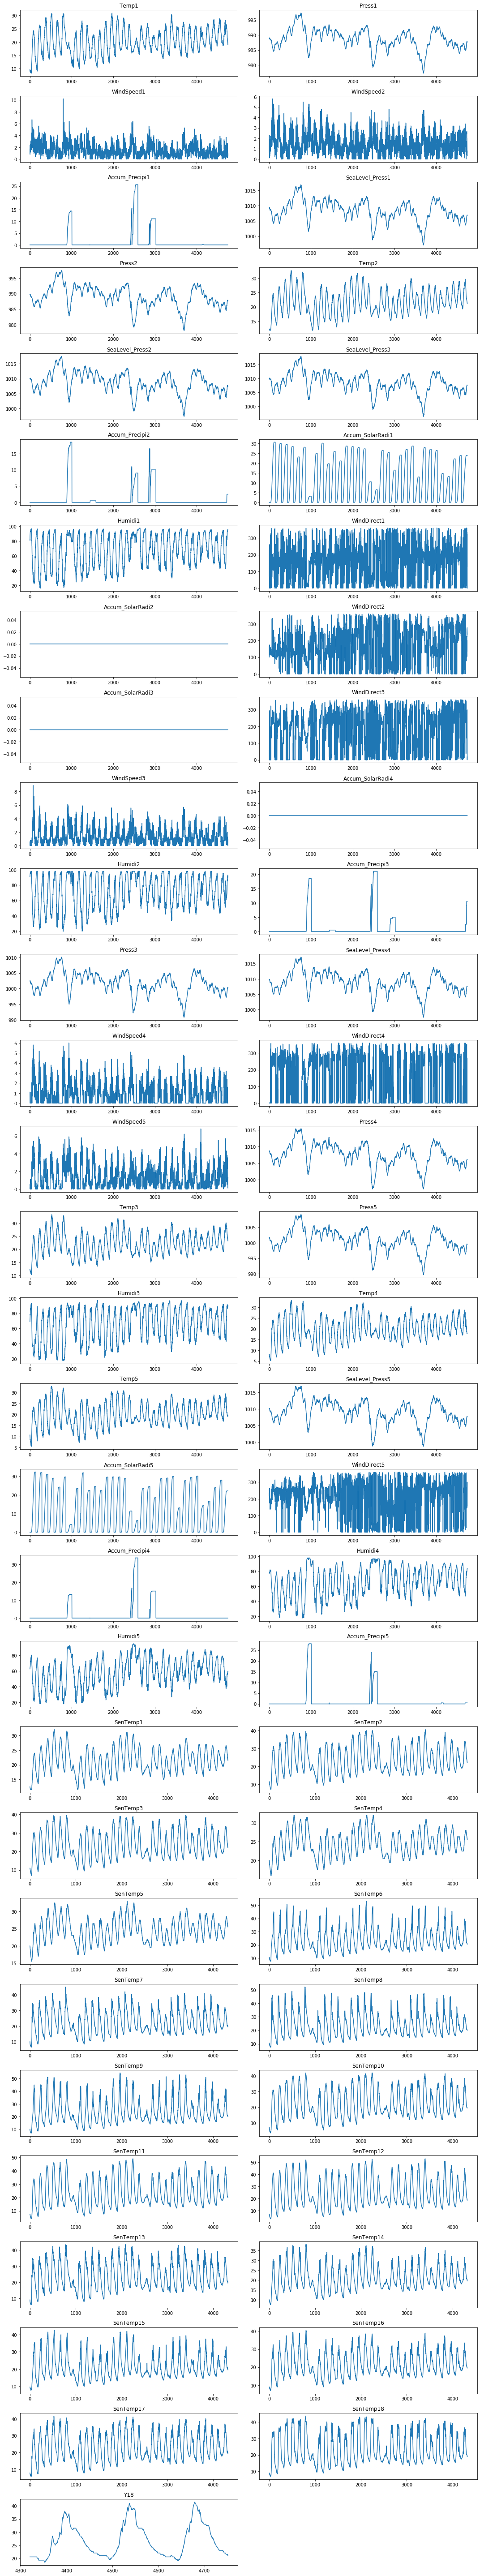

In [63]:
col = train_tmp.columns
fig = plt.figure(figsize=(15,80))

for i, column in enumerate(col):    
    plt.subplot(30,2,i+1)
    plt.plot(train_tmp[column])
    plt.title(column)
    
fig.tight_layout()
plt.show()

- 온도
- 기압
- 해면기압
- 습도  


- 풍속
- 누적강수량
- 풍향
- 누적일사량

## 1. 온도
### 온도 거의 일정하다.
00, 07, 28, 31, 32

In [ ]:
plt.plot(train['X00'])
plt.plot(train['X07'])
plt.plot(train['X28'])
plt.plot(train['X31'])
plt.plot(train['X32'])

# 2. 기압, 해면기압
### 기압은 값의 차이는 있지만 서로간의 상관관계 1에 가깝다.
01, 06, 22, 27 ,29

In [ ]:
plt.plot(train['X01'])
plt.plot(train['X06'])
plt.plot(train['X22'])
plt.plot(train['X27'])
plt.plot(train['X29'])

### 해면기압은 서로 거의 같을 뿐만 아니라 상관관계 역시 거의 1에 가깝다.
05, 08, 09, 23, 33

In [ ]:
plt.plot(train['X05'])
plt.plot(train['X08'])
plt.plot(train['X09'])
plt.plot(train['X23'])
plt.plot(train['X33'])

In [ ]:
s2=pd.concat([train['X00'],train['X01'],train['X05']],axis=1)
s2c=s2.corr()
sns.heatmap(s2c,annot=True)

# 3. 습도
### 습도 
12, 20, 30, 37, 38

In [ ]:
plt.plot(train['X12'])
plt.plot(train['X20'])
plt.plot(train['X30'])
plt.plot(train['X37'])
plt.plot(train['X38'])

### 기온과 습도는 anti-correlation 관계를 가지고 있다.
12, 20, 30, 37, 38

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train['X00'])
plt.plot(train['X12'])
plt.plot(train['X38'])

In [ ]:
temp=train[['X00', 'X07', 'X28', 'X31', 'X32']]

In [ ]:
s2=pd.concat([ temp,train['X12'],train['X20'],train['X30'],train['X37'],train['X38']],axis=1)
s2c=s2.corr()
sns.heatmap(s2c,annot=True)

# 4. 풍속
X02 X03 X18 X24 X26

In [ ]:
plt.plot(train['X00'])
plt.plot(train['X18']*3.)
#plt.xlim(-1,4000)

# 5. 누적일사량  
X11 X14 X16 X19 X34 

X14, X16, X19 탈락!

In [ ]:
plt.plot(train['X00']*3.)
plt.plot(train['X11'])
plt.plot(train['X34'])

In [ ]:
s2=train[['X00','X11','X14','X16','X19','X34']]
s2= train[['X00','X11','X34']]
s2c = s2.corr()

In [ ]:
sns.heatmap(s2c,annot=True,vmax=1.,vmin=-1,cmap='RdBu_r', linewidths=0.2)

# 누적강수량  
X04 X10 X21 X36 X39 

In [ ]:
#plt.plot(train['X00'])
plt.plot(train['X04'])
plt.plot(train['X10'])
plt.plot(train['X21'])
plt.plot(train['X36'])
plt.plot(train['X39'])

In [ ]:
new_prec=(train['X04']+train['X10']+train['X21']+train['X36']+train['X39'])/5.

# 풍향  
X13 X15 X17 X25 X35 

In [ ]:
#plt.plot(train['X00'])
plt.plot(train['X13'])
#plt.plot(train['X15'])
#plt.plot(train['X17'])

# 온도와 풍향 관계 

X13(풍향), X18(풍속)

In [ ]:
plt.plot(train['X13'])

In [ ]:
tmp1=np.array(train['X13'])
tmp2=np.zeros((len(tmp1)))

In [ ]:
print(len(tmp1))

In [ ]:
avg=20
havg=int(avg/2)

In [ ]:
for i in range(len(tmp1)):
    if i<havg:
        tmp2[i]=tmp1[i]
    elif i>len(tmp1)-havg:
        tmp2[i]=tmp1[i]
    else:
        tmp2[i]=sum(tmp1[i-havg:i+(havg+1)])/avg

In [ ]:
plt.plot(tmp2)
#plt.plot(train['X13'])

In [ ]:
s1=pd.Series(tmp2)
s2=pd.concat([train['X00'],train['X13'],s1],axis=1)

In [ ]:
s2c=s2.corr()
sns.heatmap(s2c,annot=True,vmax=1.,vmin=-1)

# 온도와 풍속

In [ ]:
new_ws= (train['X02']+train['X03']+train['X18']+train['X24']+train['X26'])/5.

In [ ]:
plt.plot(new_ws)

In [ ]:
#tmp1=np.array(train['X18'])
tmp1=np.array(new_ws)
tmp2=np.zeros((len(tmp1)))

In [ ]:
avg=8
havg=int(avg/2)

In [ ]:
for i in range(len(tmp1)):
    if i<havg:
        tmp2[i]=tmp1[i]
    elif i>len(tmp1)-havg:
        tmp2[i]=tmp1[i]
    else:
        tmp2[i]=sum(tmp1[i-havg:i+(havg+1)])/avg

In [ ]:
plt.plot(train['X00'])
plt.plot(train['X18'])

In [ ]:
plt.plot(train['X00'])
plt.plot(tmp2)

In [ ]:
tmp2=pd.Series(tmp2)

In [ ]:
s1=pd.concat([train['X00'],tmp2],axis=1)
s1.shape


In [ ]:
ss=s1.corr()
sns.heatmap(ss,annot=True,vmax=1.,vmin=-1)

In [ ]:
s2=train[['X00','X18']]
s2c = s2.corr()
sns.heatmap(s2c,annot=True,vmax=1.,vmin=-1)

In [ ]:
fig, ax = plt.subplots(figsize=(60,60), dpi=400)

data = train.iloc[:, :40].corr()
mask = np.triu(np.ones_like(data, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(data[(data >= 0.5) | (data <= -0.5)], 
            mask=mask,
            vmax=1.0, vmin=-1.0, 
            cmap='RdBu_r', linewidths=0.2,
            annot=True, annot_kws={'size': 15}, 
            square=False, cbar=True,
            cbar_kws={'shrink': .5}, ax=ax)

for _, spine in ax.spines.items():
    spine.set_visible(True)
    
ax.set_ylim(ax.get_ylim()[0]+0.5, ax.get_ylim()[1]-0.5)
fig.tight_layout()
plt.show()

In [ ]:
#plt.plot(train['Y00']-train['Y03'])

# 온도 센서로 측정한 서로 간의 상관관계

In [ ]:
corr = train.iloc[:, 41:].corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(20,15))
sns.heatmap(corr, cmap=cmap, annot=True, fmt = ".2f" ,annot_kws={"size": 20})

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12), dpi=100)

data = train.iloc[:, 41:].corr()
mask = np.triu(np.ones_like(data, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(data[(data >= 0.5) | (data <= -0.5)], 
            mask=mask,
            vmax=1.0, vmin=-1.0, 
            cmap='RdBu_r', linewidths=0.2,
            annot=True, annot_kws={'size': 15}, 
            square=False, cbar=True,
            cbar_kws={'shrink': .5}, ax=ax)

for _, spine in ax.spines.items():
    spine.set_visible(True)
    
ax.set_ylim(ax.get_ylim()[0]+0.5, ax.get_ylim()[1]-0.5)
fig.tight_layout()
plt.show()

# 데이터 데이터 데이터 처리

# Y00~Y17까지의 빈값

In [ ]:
#train.iloc[:,40],train['Y00']
#train.iloc[:,58],train['Y18']
train.iloc[:,40:58].head(50)

### Y00 ~ Y17 >>> [0:4320]: Value, [4321:]: NaN, Y_index: [40:58]
### Y18 >>> [0:4320]: NaN, [4321:]: Value, Y_index: [58]

In [ ]:
tp=0
k=0

In [ ]:
for i in range(40,58):
    if i != 46 | i != 47 | i != 52:
        tp += train.iloc[0:4320,i]
        k+=1

In [ ]:
train.shape

In [ ]:
train.iloc[0:4320,58]=tp/k

In [ ]:
train.head()

In [ ]:
x=train.iloc[:,1:40]
y=train.iloc[:,58]

In [ ]:
test_x=test.iloc[:,1:]